In [15]:
import pandas as pd
import pickle

pairwise_df= pd.read_pickle('../pairwise_correlations.pkl')
pairwise_df

,Row,Column,Correlation
0,ENSG00000180878,ENSG00000169180,0.345017
1,ENSG00000180878,ENSG00000188011,0.204027
2,ENSG00000180878,ENSG00000214456,0.389749
3,ENSG00000180878,ENSG00000122548,0.400585
4,ENSG00000180878,ENSG00000134955,0.270536
...,...,...,...
202779586,ENSG00000139737,ENSG00000089220,-0.069663
202779587,ENSG00000139737,ENSG00000197563,0.614519
202779588,ENSG00000124469,ENSG00000089220,-0.158545
202779589,ENSG00000124469,ENSG00000197563,0.331878


In [16]:
unique_ensembl_ids = list(set(pairwise_df['Row'].to_list() + pairwise_df['Column'].to_list()))

In [18]:
pairwise_df_ensembl=pd.DataFrame()
pairwise_df_ensembl['Gene stable ID'] = unique_ensembl_ids

In [19]:
pairwise_df_ensembl

,Gene stable ID
0,ENSG00000131398
1,ENSG00000064961
2,ENSG00000127663
3,ENSG00000136897
4,ENSG00000112715
...,...
20134,ENSG00000136888
20135,ENSG00000176742
20136,ENSG00000163510
20137,ENSG00000204614


In [2]:
from pybiomart import Server
import pandas as pd

# Connect to Ensembl BioMart
server = Server(host='http://www.ensembl.org')
dataset = server.marts['ENSEMBL_MART_ENSEMBL'].datasets['hsapiens_gene_ensembl']
for item in list(dataset.attributes.keys()):
    if item.startswith('uniprot'):
        print(item)
# Query Ensembl Gene ID → UniProt ID + Gene Name
mapping_df = dataset.query(attributes=[
    'ensembl_gene_id',
    'uniprotswissprot',
    'external_gene_name'
])

# Clean mapping (remove rows with missing UniProt)
mapping_df = mapping_df.dropna(subset=['UniProtKB/Swiss-Prot ID'])

# # Optionally deduplicate: keep the first UniProt ID per Ensembl ID
# mapping_df = mapping_df.drop_duplicates(subset='ensembl_gene_id')

# # Build dicts
# ensembl_to_uniprot = dict(zip(mapping_df['ensembl_gene_id'], mapping_df['uniprotswissprot']))
# ensembl_to_gene = dict(zip(mapping_df['ensembl_gene_id'], mapping_df['external_gene_name']))


uniprot_gn_id
uniprot_gn_symbol
uniprot_isoform
uniprotswissprot
uniprotsptrembl


In [20]:
mapping_df

,Gene stable ID,UniProtKB/Swiss-Prot ID,Gene name
0,ENSG00000198888,P03886,MT-ND1
1,ENSG00000198763,P03891,MT-ND2
2,ENSG00000198804,P00395,MT-CO1
3,ENSG00000198712,P00403,MT-CO2
4,ENSG00000228253,P03928,MT-ATP8
...,...,...,...
38623,ENSG00000284188,A0A1W2PPE3,C1orf202
38625,ENSG00000243749,Q8NCS4,TMEM35B
38627,ENSG00000163867,O95789,ZMYM6
38629,ENSG00000197056,Q5SVZ6,ZMYM1


In [24]:
mapping_df.merge(pairwise_df_ensembl, on = 'Gene stable ID', how='inner').drop_duplicates(subset = 'Gene stable ID')

,Gene stable ID,UniProtKB/Swiss-Prot ID,Gene name
0,ENSG00000198888,P03886,MT-ND1
1,ENSG00000198763,P03891,MT-ND2
2,ENSG00000198804,P00395,MT-CO1
3,ENSG00000198712,P00403,MT-CO2
4,ENSG00000228253,P03928,MT-ATP8
...,...,...,...
19327,ENSG00000284188,A0A1W2PPE3,C1orf202
19328,ENSG00000243749,Q8NCS4,TMEM35B
19329,ENSG00000163867,O95789,ZMYM6
19330,ENSG00000197056,Q5SVZ6,ZMYM1


In [5]:
mapping_df.columns

Index(['Gene stable ID', 'UniProtKB/Swiss-Prot ID', 'Gene name'], dtype='object')

In [7]:
mapping_df.drop_duplicates(subset='Gene name')

,Gene stable ID,UniProtKB/Swiss-Prot ID,Gene name
0,ENSG00000198888,P03886,MT-ND1
1,ENSG00000198763,P03891,MT-ND2
2,ENSG00000198804,P00395,MT-CO1
3,ENSG00000198712,P00403,MT-CO2
4,ENSG00000228253,P03928,MT-ATP8
...,...,...,...
38623,ENSG00000284188,A0A1W2PPE3,C1orf202
38625,ENSG00000243749,Q8NCS4,TMEM35B
38627,ENSG00000163867,O95789,ZMYM6
38629,ENSG00000197056,Q5SVZ6,ZMYM1


In [8]:
mapping_df.drop_duplicates(subset='Gene stable ID')

,Gene stable ID,UniProtKB/Swiss-Prot ID,Gene name
0,ENSG00000198888,P03886,MT-ND1
1,ENSG00000198763,P03891,MT-ND2
2,ENSG00000198804,P00395,MT-CO1
3,ENSG00000198712,P00403,MT-CO2
4,ENSG00000228253,P03928,MT-ATP8
...,...,...,...
38623,ENSG00000284188,A0A1W2PPE3,C1orf202
38625,ENSG00000243749,Q8NCS4,TMEM35B
38627,ENSG00000163867,O95789,ZMYM6
38629,ENSG00000197056,Q5SVZ6,ZMYM1


In [9]:
uni = mapping_df.drop_duplicates(subset='UniProtKB/Swiss-Prot ID')

In [10]:
uni.shape

(19350, 3)

In [12]:
uni.drop_duplicates(subset='Gene stable ID').drop_duplicates(subset = 'Gene name')

,Gene stable ID,UniProtKB/Swiss-Prot ID,Gene name
0,ENSG00000198888,P03886,MT-ND1
1,ENSG00000198763,P03891,MT-ND2
2,ENSG00000198804,P00395,MT-CO1
3,ENSG00000198712,P00403,MT-CO2
4,ENSG00000228253,P03928,MT-ATP8
...,...,...,...
38623,ENSG00000284188,A0A1W2PPE3,C1orf202
38625,ENSG00000243749,Q8NCS4,TMEM35B
38627,ENSG00000163867,O95789,ZMYM6
38629,ENSG00000197056,Q5SVZ6,ZMYM1


In [18]:
mapping_df = mapping_df.drop_duplicates(subset='Gene stable ID')

In [21]:
mapping_df.to_csv('ensemblID_Uniprot_Gene-Name_mapping.csv', index=False)

In [4]:
mapping_df = pd.read_csv('./gene_embedding_analysis/ensemblID_Uniprot_Gene-Name_mapping.csv')

In [22]:
mapping_df

,Gene stable ID,UniProtKB/Swiss-Prot ID,Gene name
0,ENSG00000198888,P03886,MT-ND1
1,ENSG00000198763,P03891,MT-ND2
2,ENSG00000198804,P00395,MT-CO1
3,ENSG00000198712,P00403,MT-CO2
4,ENSG00000228253,P03928,MT-ATP8
...,...,...,...
38623,ENSG00000284188,A0A1W2PPE3,C1orf202
38625,ENSG00000243749,Q8NCS4,TMEM35B
38627,ENSG00000163867,O95789,ZMYM6
38629,ENSG00000197056,Q5SVZ6,ZMYM1


In [6]:
gene_similarity_table = pd.read_pickle('gene_similarity_gobp_value.pkl')

In [5]:
import pandas as pd

# Step 1: Create mapping from gene name to Ensembl ID
gene_to_ensembl = dict(zip(mapping_df['Gene name'], mapping_df['Gene stable ID']))


In [7]:
# Step 2: Map Gene_A and Gene_B to Ensembl IDs
gene_similarity_table['Gene_A_Ensembl'] = gene_similarity_table['Gene_A'].map(gene_to_ensembl)


In [8]:
gene_similarity_table['Gene_B_Ensembl'] = gene_similarity_table['Gene_B'].map(gene_to_ensembl)


In [9]:

# Step 3: Prepare correlation table for merging
pairwise_df.rename(columns={'Row': 'Gene_A_Ensembl', 'Column': 'Gene_B_Ensembl'}, inplace=True)



In [11]:
# Step 4: Merge — try both original and reversed directions
merged = pd.merge(
    gene_similarity_table,
    pairwise_df[['Gene_A_Ensembl', 'Gene_B_Ensembl', 'Correlation']],
    on=['Gene_A_Ensembl', 'Gene_B_Ensembl'],
    how='left'
)


In [32]:
merged.dropna()

,Gene_A,Gene_B,Similarity,GOBP_value,Gene_A_Ensembl,Gene_B_Ensembl,Correlation
42865,CD300H,PTPA,-0.045884,0.0,ENSG00000284690,ENSG00000119383,-0.012537
43090,CD300H,PAK5,0.041580,0.0,ENSG00000284690,ENSG00000101349,0.084023
43091,CD300H,BAP1,0.115650,0.0,ENSG00000284690,ENSG00000163930,0.013716
43269,CD300H,NMB,0.061330,0.0,ENSG00000284690,ENSG00000197696,0.077617
43326,CD300H,NAF1,0.027752,0.0,ENSG00000284690,ENSG00000145414,0.025985
...,...,...,...,...,...,...,...
200776377,BCAT1,TMPRSS3,0.094981,0.0,ENSG00000060982,ENSG00000160183,0.154140
200776434,BCAT1,TPP1,0.063980,0.0,ENSG00000060982,ENSG00000166340,0.319412
200776892,BCAT1,ZNF20,-0.005287,0.0,ENSG00000060982,ENSG00000132010,0.349904
200776899,BCAT1,ZNF230,0.062917,0.0,ENSG00000060982,ENSG00000159882,0.339114


In [13]:
missing = merged[merged['Correlation'].isna()]
if not missing.empty:
    correlation_df_swapped = pairwise_df.rename(columns={
        'Gene_A_Ensembl': 'Gene_B_Ensembl',
        'Gene_B_Ensembl': 'Gene_A_Ensembl'
    })
    merged_swapped = pd.merge(
        missing.drop(columns=['Correlation']),
        correlation_df_swapped[['Gene_A_Ensembl', 'Gene_B_Ensembl', 'Correlation']],
        on=['Gene_A_Ensembl', 'Gene_B_Ensembl'],
        how='left'
    )
    # Fill in missing correlation values
    merged.update(merged_swapped)



In [38]:
pairwise_df.shape

(202779591, 3)

In [34]:
final_df

,Gene_A,Gene_B,Similarity,GOBP_value,Gene_A_Ensembl,Gene_B_Ensembl,Correlation
0,ST13P4,WASH2P,0.357125,0.0,NaN,NaN,NaN
1,ST13P4,FAM90A12P,0.106240,0.0,NaN,NaN,NaN
2,ST13P4,PI4KAP1,0.160441,0.0,NaN,NaN,NaN
3,ST13P4,SNX29P2,0.211458,0.0,NaN,NaN,NaN
4,ST13P4,ZNF818P,0.100117,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
200794870,RBMXP1,PPT1,-0.122568,0.0,NaN,ENSG00000131238,NaN
200794871,RBMXP1,PLD2,0.069859,0.0,NaN,ENSG00000129219,NaN
200794872,RBMXP1,EIF4EBP1,-0.037521,0.0,NaN,ENSG00000187840,NaN
200794873,RBMXP1,TINAG,0.135589,0.0,NaN,ENSG00000137251,NaN


In [14]:
spearman_cosine=merged.dropna()

In [15]:
spearman_cosine.to_pickle('gene_similarity_gobp_value_correlation.pkl')

In [16]:
complexes = pd.read_pickle('gene_embedding_analysis/gene_pairs_complex_label.pkl')

In [19]:
complexes.columns

Index(['Gene_A', 'Gene_B', 'Similarity', 'GOBP_value', 'Gene_A_complex',
       'Gene_B_complex', 'Same_Complex'],
      dtype='object')

In [18]:
spearman_cosine

,Gene_A,Gene_B,Similarity,GOBP_value,Gene_A_Ensembl,Gene_B_Ensembl,Correlation
42858,CD300H,BAG3,-0.014233,0.0,ENSG00000284690,ENSG00000151929,0.032506
42859,CD300H,PTPRS,-0.034482,0.0,ENSG00000284690,ENSG00000105426,0.059615
42861,CD300H,PTPRN2,0.089971,0.0,ENSG00000284690,ENSG00000155093,0.032927
42864,CD300H,OR5A1,0.106884,0.0,ENSG00000284690,ENSG00000172320,0.167973
42865,CD300H,FAM71E2,0.111280,0.0,ENSG00000284690,ENSG00000119383,-0.012537
...,...,...,...,...,...,...,...
200776377,BCAT1,TMPRSS3,0.094981,0.0,ENSG00000060982,ENSG00000160183,0.154140
200776434,BCAT1,TPP1,0.063980,0.0,ENSG00000060982,ENSG00000166340,0.319412
200776892,BCAT1,ZNF20,-0.005287,0.0,ENSG00000060982,ENSG00000132010,0.349904
200776899,BCAT1,ZNF230,0.062917,0.0,ENSG00000060982,ENSG00000159882,0.339114


In [22]:
complexes

,Gene_A,Gene_B,Similarity,GOBP_value,Gene_A_complex,Gene_B_complex,Same_Complex
0,ST13P4,WASH2P,0.357125,0.0,NaN,CPX-1168,0
1,ST13P4,WASH2P,0.357125,0.0,NaN,CPX-1173,0
2,ST13P4,FAM90A12P,0.106240,0.0,NaN,NaN,0
3,ST13P4,PI4KAP1,0.160441,0.0,NaN,NaN,0
4,ST13P4,SNX29P2,0.211458,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...
325245048,RBMXP1,PPT1,-0.122568,0.0,NaN,NaN,0
325245049,RBMXP1,PLD2,0.069859,0.0,NaN,NaN,0
325245050,RBMXP1,EIF4EBP1,-0.037521,0.0,NaN,NaN,0
325245051,RBMXP1,TINAG,0.135589,0.0,NaN,NaN,0


In [20]:
df = spearman_cosine[['Gene_A', 'Gene_B', 'Correlation']].merge(complexes, on = ['Gene_A', 'Gene_B'], how = 'inner')

In [23]:
df.columns

Index(['Gene_A', 'Gene_B', 'Correlation', 'Similarity', 'GOBP_value',
       'Gene_A_complex', 'Gene_B_complex', 'Same_Complex'],
      dtype='object')

In [24]:
df = df[['Gene_A', 'Gene_B', 'Correlation', 'Similarity', 'GOBP_value', 'Same_Complex']].dropna()

In [26]:
df['Same_Complex'].value_counts()

0    285626563
1        37445
Name: Same_Complex, dtype: int64

In [28]:
df = df.drop_duplicates()

In [29]:
df.to_pickle('correlation_similarity_complex.pkl')

In [1]:
import pandas as pd
import pickle

df=pd.read_pickle('correlation_similarity_complex.pkl')

In [2]:
df

,Gene_A,Gene_B,Correlation,Similarity,GOBP_value,Same_Complex
0,CD300H,BAG3,0.032506,-0.014233,0.0,0
1,CD300H,PTPRS,0.059615,-0.034482,0.0,0
2,CD300H,PTPRN2,0.032927,0.089971,0.0,0
3,CD300H,OR5A1,0.167973,0.106884,0.0,0
4,CD300H,FAM71E2,-0.012537,0.111280,0.0,0
...,...,...,...,...,...,...
285664003,BCAT1,TMPRSS3,0.154140,0.094981,0.0,0
285664004,BCAT1,TPP1,0.319412,0.063980,0.0,0
285664005,BCAT1,ZNF20,0.349904,-0.005287,0.0,0
285664006,BCAT1,ZNF230,0.339114,0.062917,0.0,0


In [3]:
df1 = df[df['Same_Complex']==1].sample(n=1000)

In [4]:
df2 = df[df['Same_Complex']==0].sample(n=1000)

In [5]:
df1

,Gene_A,Gene_B,Correlation,Similarity,GOBP_value,Same_Complex
278753884,DDX46,SF3A3,0.459104,0.200446,1.0,1
88221661,ITGB2,ITGAX,0.565006,0.175423,1.0,1
87239528,TBL3,UTP6,0.491912,0.253124,1.0,1
106578025,RPL37A,RPL13A,0.817617,0.438879,1.0,1
3204328,PPIL2,PRPF8,0.527715,0.121679,0.0,1
...,...,...,...,...,...,...
169849753,SYCE3,SYCE2,0.535189,0.344027,1.0,1
21469213,SNRPD3,SNRPG,0.512933,0.377212,1.0,1
178227323,BATF3,ATF3,0.243210,0.039605,0.0,1
37148258,MED11,MED28,0.430709,0.099208,1.0,1


In [6]:
df['Same_Complex'].value_counts()

0    173514406
1        16739
Name: Same_Complex, dtype: int64

Matplotlib is building the font cache; this may take a moment.


<Axes: >

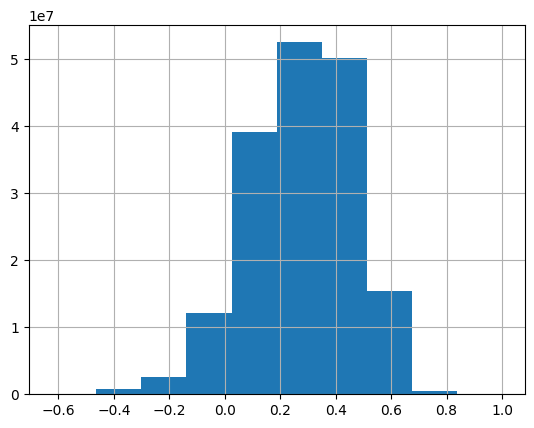

In [34]:
df['Correlation'].hist()

<Axes: >

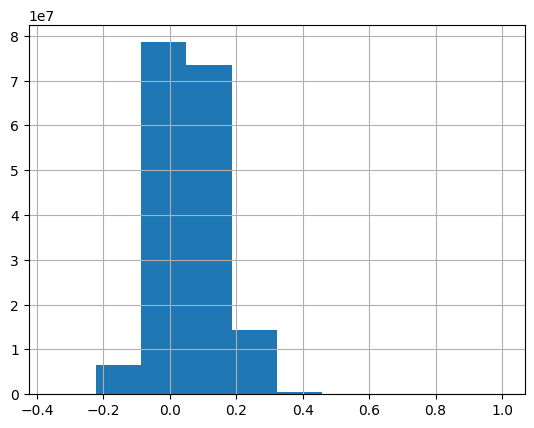

In [35]:
df['Similarity'].hist()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind
from matplotlib.patches import Patch

def plot_grouped_boxplot(df, label_col='Group', value_col='Similarity', alpha=0.05):
    """
    Plots a boxplot for a numeric column grouped by a categorical label column.
    If exactly two groups, performs a t-test and adds significance info to the legend title.

    Parameters:
    - df: pandas DataFrame
    - label_col: name of the categorical column
    - value_col: name of the numeric column
    - alpha: significance level for t-test

    Returns:
    - (t_statistic, p_value) if t-test performed, else None
    """
    df = df[[label_col, value_col]].dropna()
    df = df[[label_col, value_col]].dropna()

    # Rename 0 and 1 values in the label column
    df[label_col] = df[label_col].apply(lambda x: f"{label_col}_{int(x)}" if x in [0, 1] else str(x))

    # Set up color palette
    
    unique_groups = sorted(df[label_col].unique())
    palette = sns.color_palette('Set2', len(unique_groups))
    color_map = dict(zip(unique_groups, palette))
    # unique_groups = sorted(df[label_col].unique(), key=lambda x: str(x))
    # palette = sns.color_palette('Set2', len(unique_groups))
    # color_map = dict(zip(unique_groups, palette))

    # Plot
    plt.figure(figsize=(6, 8))
    ax = sns.boxplot(data=df, x=label_col, y=value_col, palette=color_map, dodge=False)

    # Run t-test if exactly 2 groups
    t_stat, p_val = None, None
    if len(unique_groups) == 2:
        group1 = df[df[label_col] == unique_groups[0]][value_col]
        group2 = df[df[label_col] == unique_groups[1]][value_col]
        t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
        sig_text = f"p-value = {p_val:.3g} (significant)\nt-statistic = {t_stat:.3g}" if p_val < alpha else f"p = {p_val:.3g} (ns)\nt-statistic = {t_stat:.3g}"
    else:
        sig_text = "Distribution by group"

    # Custom legend with colors and p-value
    legend_handles = [Patch(color=color_map[group], label=group) for group in unique_groups]
    ax.legend(handles=legend_handles, title=sig_text)

    # Final formatting
    plt.title(f"{value_col} by {label_col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return t_stat, p_val


In [8]:
sampled= pd.concat([df1, df2])

/tmp/ipykernel_11310/3608023453.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x=label_col, y=value_col, palette=color_map, dodge=False)


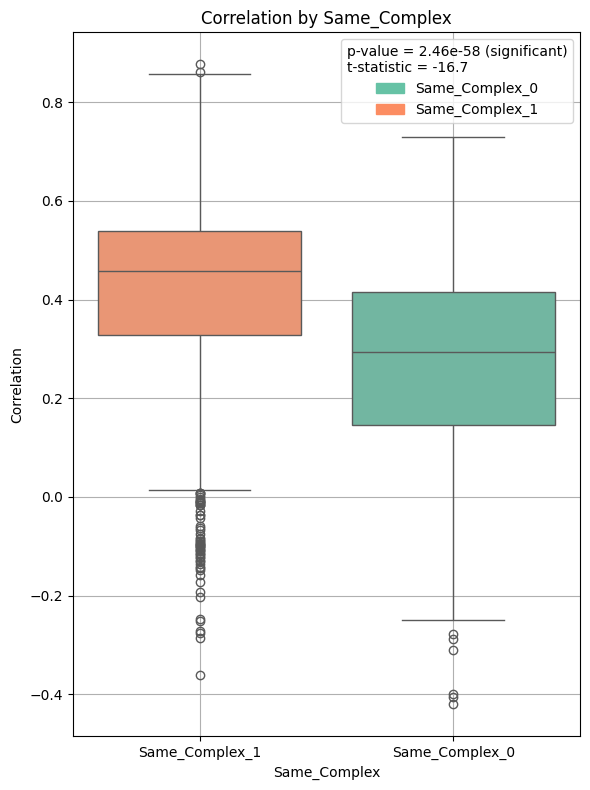

(-16.650796348757968, 2.462611062606663e-58)

In [9]:
plot_grouped_boxplot(sampled, label_col = 'Same_Complex', value_col = 'Correlation')

/tmp/ipykernel_11310/3608023453.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x=label_col, y=value_col, palette=color_map, dodge=False)


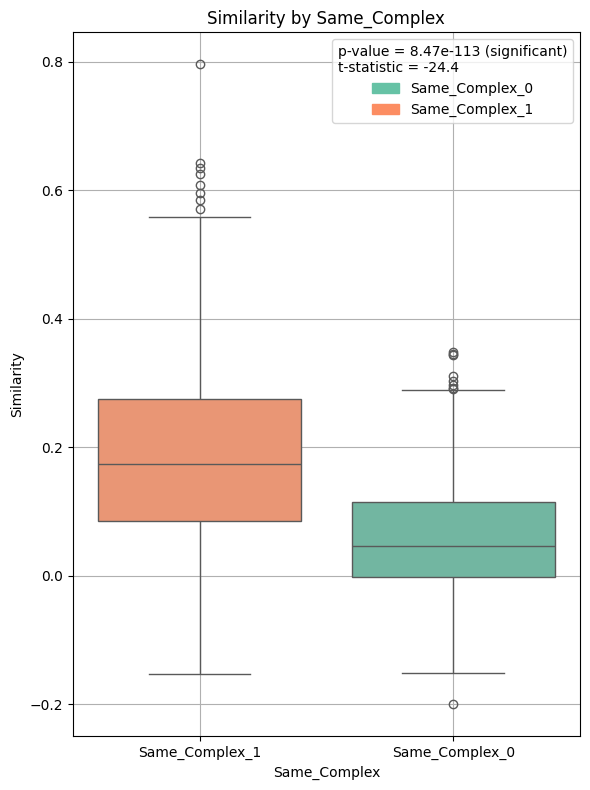

(-24.386763301967306, 8.472819851321706e-113)

In [10]:
plot_grouped_boxplot(sampled, label_col = 'Same_Complex', value_col = 'Similarity')